In [129]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [130]:
X_train = pd.read_csv("big-data/X_train.csv")
Y_train = pd.read_csv("big-data/Y_train.csv")

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train, 
    Y_train, 
    test_size=0.2, 
    random_state=42)

In [132]:
X_train.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
1937,25.19,25.19,24.63,25.56,0,0,0,0,0.08,0.05,0.06,0.05,360,0.000000,0,0
4477,25.38,25.38,24.81,25.75,0,0,0,0,0.07,0.05,0.06,0.06,365,0.000000,0,0
8550,25.56,25.63,25.31,25.69,0,0,0,0,0.07,0.05,0.05,0.08,530,-2.592308,0,0
1346,25.50,25.50,25.06,25.88,0,0,0,0,0.07,0.04,0.07,0.06,390,-0.642308,0,0
7296,25.38,25.38,24.88,25.75,0,0,0,0,0.07,0.05,0.06,0.10,355,0.000000,0,0


In [133]:
# X_train = X_train.drop("PatientID", axis = 1)
# Y_train = Y_train.drop("PatientID", axis = 1)
# X_test = X_test.drop("PatientID", axis = 1)

In [134]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [135]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])
X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [136]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((16, 8103), (1, 8103), (16, 2026), (1, 2026))

Accuracy

In [137]:
def accuracy(A, Y):
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])
    
    return acc

Model

In [138]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [139]:
def model(X_train, Y_train, X_test, Y_test, learning_rate, iterations):
    m = X_train.shape[1]
    n = X_train.shape[0]
    W = np.zeros((n, 1))
    B = 0

    cost_list_train=[]
    cost_list_test=[]
    custom_time = []
    acc_list_train=[]
    acc_list_test=[]

    for i in range(iterations):
        start_time = time.time()
        Z_train = np.dot(W.T, X_train) + B
        A_train = sigmoid(Z_train)

        Z_test = np.dot(W.T, X_test) + B
        A_test = sigmoid(Z_test)

        # cost function
        cost_train = -(1 / m) * np.sum(Y_train * np.log(A_train) + (1 - Y_train) * np.log(1 - A_train))
        cost_test = -(1 / m) * np.sum(Y_test * np.log(A_test) + (1 - Y_test) * np.log(1 - A_test))

        # Gradient Descent
        dW = (1 / m) * np.dot(A_train - Y_train, X_train.T)
        dB = (1 / m) * np.sum(A_train - Y_train)

        W = W - learning_rate * dW.T
        B = B - learning_rate * dB

        # Keeping track of our cost function value
        cost_list_train.append(cost_train)
        cost_list_test.append(cost_test)

        acc_train = accuracy(A_train, Y_train)
        acc_test = accuracy(A_test, Y_test)

        acc_list_train.append(acc_train)
        acc_list_test.append(acc_test)

        if i % (iterations // 10) == 0:
            print(f"Cost at iteration {i}; Loss_Train: {cost_train:.6f} | Loss_Test: {cost_test:.6f} | Acc_Train: {acc_train:.6f} | Acc_Test: {acc_test:.6f}")

        end_time = time.time()
        custom_time.append(end_time - start_time)
        

    return W, B, cost_list_train, cost_list_test, custom_time, acc_list_train, acc_list_test

In [140]:
def predict(X, W, B):
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)

    A = A > 0.5

    A = np.array(A, dtype="int64")

    return A

In [141]:
iterations = 5000
learning_rate = 0.0001

W, B, cost_list_train, cost_list_test, custom_time, acc_list_train, acc_list_test = model(
    X_train, Y_train, 
    X_test, Y_test, 
    learning_rate, iterations)
print(f"Tổng thời gian chạy của Custom Model: {sum(custom_time):.2f}s")

Cost at iteration 0; Loss_Train: 0.693147 | Loss_Test: 0.173308 | Acc_Train: 0.815624 | Acc_Test: 0.799112
Cost at iteration 500; Loss_Train: 0.102049 | Loss_Test: 0.022488 | Acc_Train: 0.981242 | Acc_Test: 0.983218
Cost at iteration 1000; Loss_Train: 0.091885 | Loss_Test: 0.020687 | Acc_Train: 0.981242 | Acc_Test: 0.983218
Cost at iteration 1500; Loss_Train: 0.086654 | Loss_Test: 0.019835 | Acc_Train: 0.981242 | Acc_Test: 0.983218
Cost at iteration 2000; Loss_Train: 0.083958 | Loss_Test: 0.019425 | Acc_Train: 0.981242 | Acc_Test: 0.983218
Cost at iteration 2500; Loss_Train: 0.082575 | Loss_Test: 0.019235 | Acc_Train: 0.981242 | Acc_Test: 0.983218
Cost at iteration 3000; Loss_Train: 0.081817 | Loss_Test: 0.019144 | Acc_Train: 0.981242 | Acc_Test: 0.983218
Cost at iteration 3500; Loss_Train: 0.081350 | Loss_Test: 0.019094 | Acc_Train: 0.981242 | Acc_Test: 0.983218
Cost at iteration 4000; Loss_Train: 0.081023 | Loss_Test: 0.019060 | Acc_Train: 0.981242 | Acc_Test: 0.983218
Cost at iterat

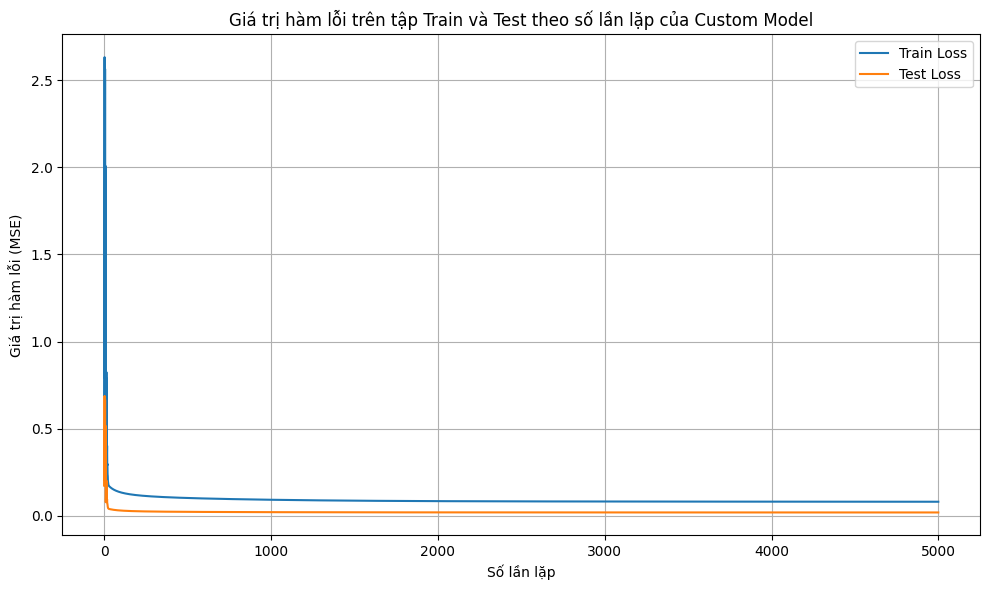

In [142]:
# Vẽ biểu đồ 
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_list_train, label="Train Loss")
plt.plot(range(iterations), cost_list_test, label="Test Loss")
plt.xlabel("Số lần lặp")
plt.ylabel("Giá trị hàm lỗi (MSE)")
plt.legend()
plt.title("Giá trị hàm lỗi trên tập Train và Test theo số lần lặp của Custom Model")
plt.grid()
plt.tight_layout() 
plt.show()

Sklearn

In [143]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning


In [144]:
X_train = X_train.T
Y_train = Y_train.ravel()
X_test = X_test.T
Y_test = Y_test.ravel()

In [145]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)

    # Create and train your logistic regression model
    model = LogisticRegression(solver='sag', max_iter=1, random_state=27, warm_start=True)

    # Lists to store iteration and loss values
    loss_train_values = []
    loss_test_values = []
    sklearn_time = []
    acc_train_values = []
    acc_test_values = []

    for i in range(iterations):
        start_time = time.time()
        model.fit(X_train, Y_train)

        # Calculate the loss using the log loss (cross-entropy) function
        probas_train = model.predict_proba(X_train)
        loss_train = log_loss(Y_train, probas_train)

        probas_test = model.predict_proba(X_test)
        loss_test = log_loss(Y_test, probas_test)

        loss_train_values.append(loss_train)
        loss_test_values.append(loss_test)

        acc_train = accuracy_score(Y_train, model.predict(X_train))
        acc_test = accuracy_score(Y_test, model.predict(X_test))

        acc_train_values.append(acc_train)
        acc_test_values.append(acc_test)

        if i % (iterations // 10) == 0:
            print(f"Epoch {i}, Loss Train: {loss_train:.6f}, Loss Test: {loss_test:.6f}, Train Acc: {acc_train:.6f}, Test Acc: {acc_test:.6f}")
        end_time = time.time()
        sklearn_time.append(end_time - start_time)
    print(f"Tổng thời gian chạy của Sklearn Model: {sum(sklearn_time):.2f}s")

Epoch 0, Loss Train: 0.141979, Loss Test: 0.115912, Train Acc: 0.981118, Test Acc: 0.983218
Epoch 500, Loss Train: 0.061165, Loss Test: 0.059177, Train Acc: 0.981242, Test Acc: 0.983218
Epoch 1000, Loss Train: 0.051514, Loss Test: 0.050816, Train Acc: 0.981365, Test Acc: 0.983218
Epoch 1500, Loss Train: 0.044364, Loss Test: 0.044718, Train Acc: 0.982229, Test Acc: 0.983712
Epoch 2000, Loss Train: 0.038169, Loss Test: 0.039485, Train Acc: 0.983463, Test Acc: 0.984699
Epoch 2500, Loss Train: 0.033050, Loss Test: 0.035192, Train Acc: 0.985931, Test Acc: 0.985686
Epoch 3000, Loss Train: 0.029138, Loss Test: 0.031954, Train Acc: 0.987412, Test Acc: 0.986673
Epoch 3500, Loss Train: 0.026331, Loss Test: 0.029684, Train Acc: 0.989387, Test Acc: 0.987660
Epoch 4000, Loss Train: 0.024389, Loss Test: 0.028173, Train Acc: 0.990991, Test Acc: 0.988648
Epoch 4500, Loss Train: 0.023065, Loss Test: 0.027200, Train Acc: 0.991855, Test Acc: 0.989635
Tổng thời gian chạy của Sklearn Model: 38.41s


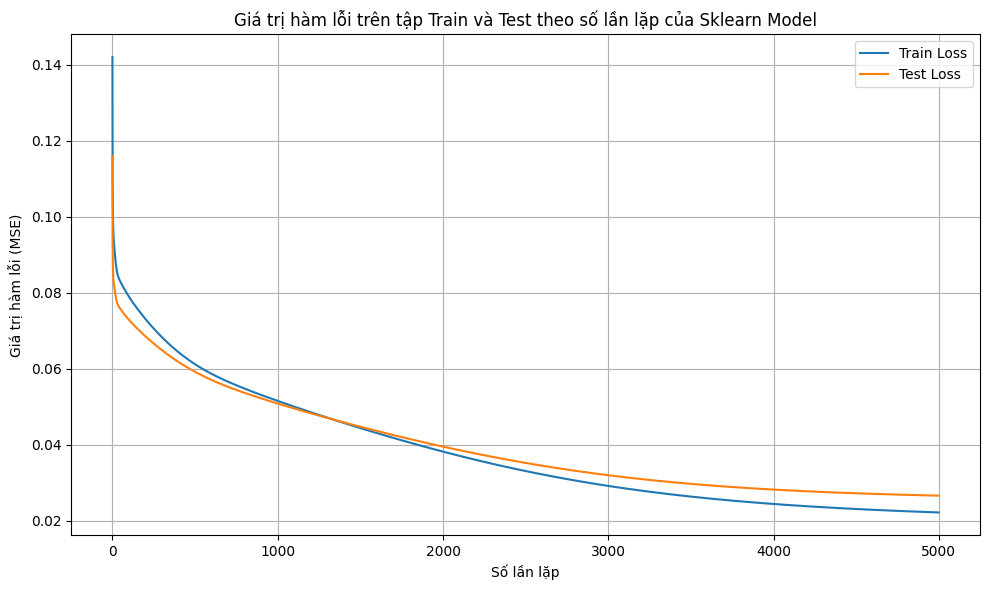

In [146]:
# Vẽ biểu đồ 
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), loss_train_values, label="Train Loss")
plt.plot(range(iterations), loss_test_values, label="Test Loss")
plt.xlabel("Số lần lặp")
plt.ylabel("Giá trị hàm lỗi (MSE)")
plt.legend()
plt.title("Giá trị hàm lỗi trên tập Train và Test theo số lần lặp của Sklearn Model")
plt.grid()
plt.tight_layout() 
plt.show()

Compare

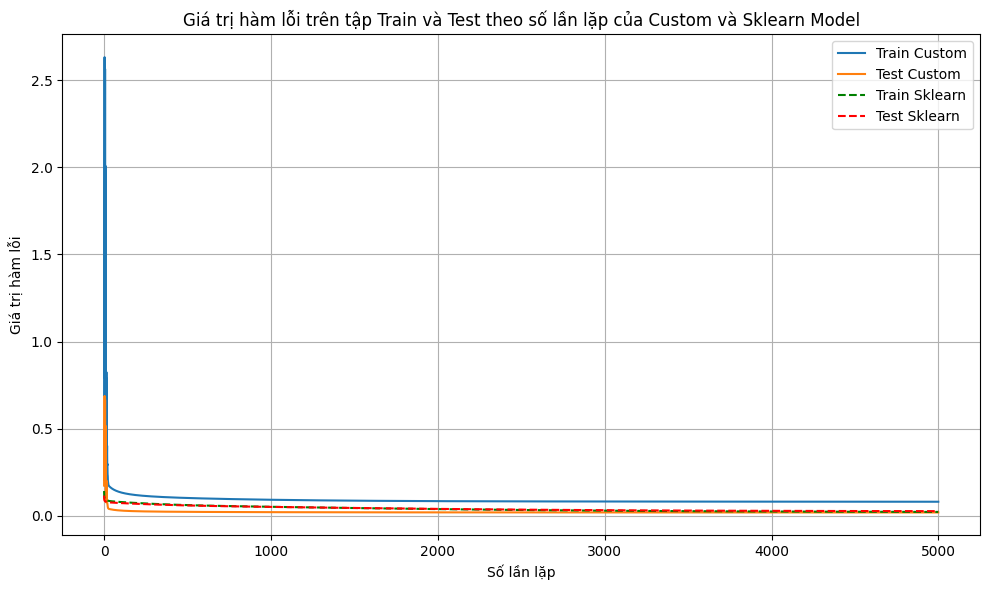

In [147]:
# Vẽ đồ thị lỗi
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_list_train, label='Train Custom')
plt.plot(range(iterations), cost_list_test, label='Test Custom')
plt.plot(range(iterations), loss_train_values, label='Train Sklearn', linestyle='--', color='green')
plt.plot(range(iterations), loss_test_values, label='Test Sklearn', linestyle='--', color='red')
plt.xlabel("Số lần lặp")
plt.ylabel("Giá trị hàm lỗi")
plt.legend()
plt.title("Giá trị hàm lỗi trên tập Train và Test theo số lần lặp của Custom và Sklearn Model")
plt.grid()
plt.tight_layout() 
plt.show()

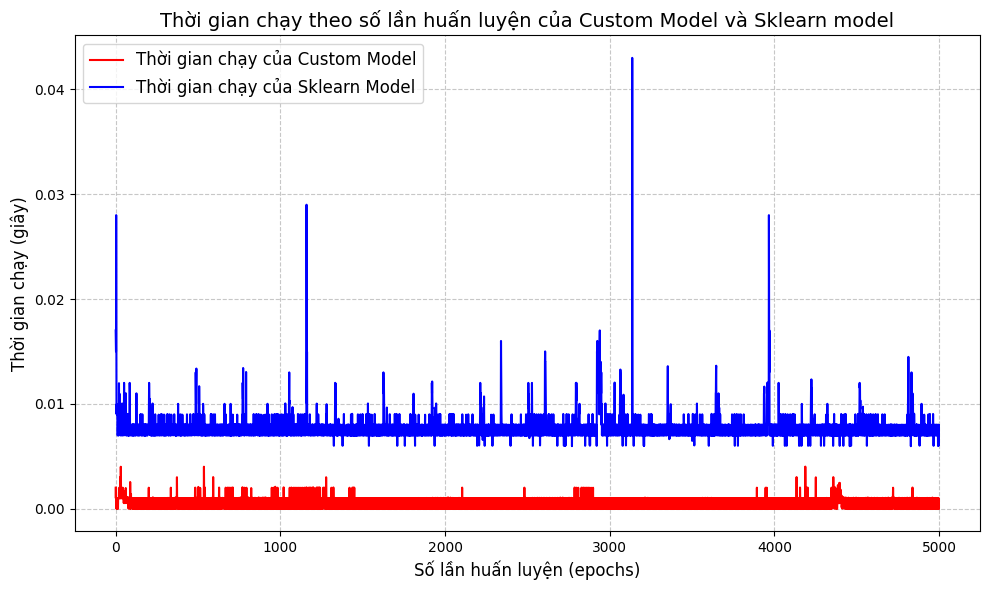

In [148]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), custom_time, color='red', label='Thời gian chạy của Custom Model')
plt.plot(range(iterations), sklearn_time, color='blue', label='Thời gian chạy của Sklearn Model')
plt.xlabel("Số lần huấn luyện (epochs)", fontsize=12)
plt.ylabel("Thời gian chạy (giây)", fontsize=12)
plt.title("Thời gian chạy theo số lần huấn luyện của Custom Model và Sklearn model", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

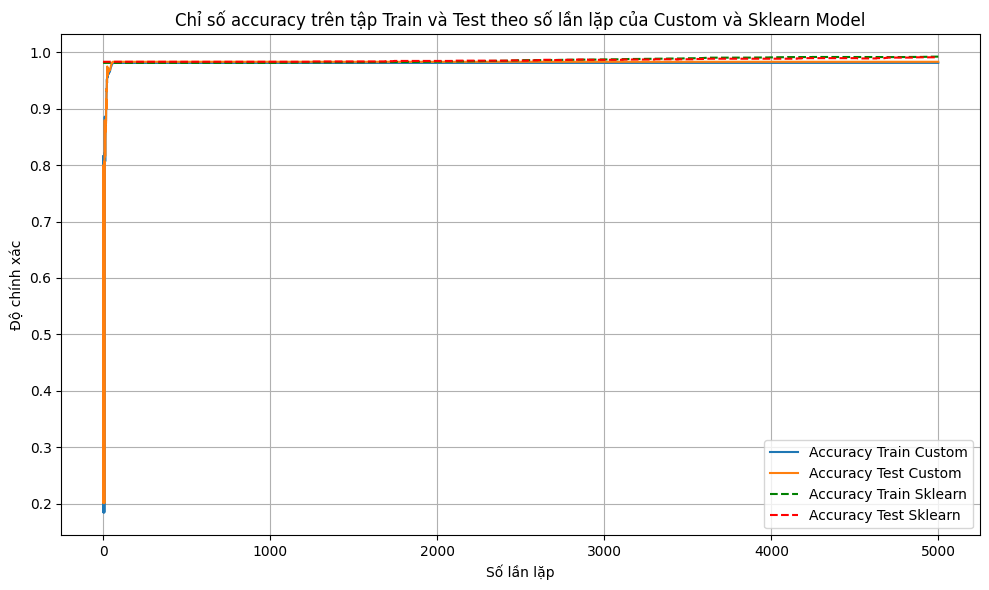

In [149]:
# Vẽ đồ thị lỗi
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), acc_list_train, label='Accuracy Train Custom')
plt.plot(range(iterations), acc_list_test, label='Accuracy Test Custom')
plt.plot(range(iterations), acc_train_values, label='Accuracy Train Sklearn', linestyle='--', color='green')
plt.plot(range(iterations), acc_test_values, label='Accuracy Test Sklearn', linestyle='--', color='red')
plt.xlabel("Số lần lặp")
plt.ylabel("Độ chính xác")
plt.legend()
plt.title("Chỉ số accuracy trên tập Train và Test theo số lần lặp của Custom và Sklearn Model")
plt.grid()
plt.tight_layout() 
plt.show()